## 读入原图并使用Bicubic进行下采样

In [12]:
import cv2
import os

def resize_images(input_folder, output_folder, scale_factor, suffix):
    # 检查输出文件夹是否存在
    if not os.path.exists(output_folder):
        # os.makedirs(output_folder)
        exit(0)

    # 遍历输入文件夹中的所有文件
    for filename in os.listdir(input_folder):
        # 获取完整的文件路径
        input_path = os.path.join(input_folder, filename)

        # 检查文件是否为图像文件
        if not os.path.isfile(input_path) or not any(filename.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png']):
            continue

        # 读取图像
        img = cv2.imread(input_path)

        # 计算新的图像尺寸
        new_width = int(img.shape[1] * scale_factor)
        new_height = int(img.shape[0] * scale_factor)

        # 使用bicubic插值进行下采样
        resized_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

        # 构建输出文件路径
        output_filename = os.path.splitext(filename)[0] + suffix + os.path.splitext(filename)[1]
        output_path = os.path.join(output_folder, output_filename)

        # 保存下采样后的图像
        cv2.imwrite(output_path, resized_img)

        print(f"Processed: {filename}")

src_path = './srgan/src/dataset/Set5/HR'
target_path = './srgan/src/dataset/Set5/LR'


# resize_images(src_path, target_path + '/2x', 0.5, '_2x')
resize_images(src_path, target_path + '/4x', 0.25, '_4x')
# resize_images(src_path, target_path + '/8x', 0.125, '_8x')

Processed: baby.png
Processed: bird.png
Processed: butterfly.png
Processed: head.png
Processed: woman.png


## 运行SRGAN

```bash
cd ./srgan
python -m src.infer --scale 4 --test_LR_path ".\src\dataset\Set5\LR\4x" --generator_path ".\src\ckpt\G_model_1000.ckpt"
# python -m src.infer --scale 2 --test_LR_path ".\src\dataset\Set5\LR\2x" --generator_path ".\src\ckpt\G_model_1000.ckpt"
# python -m src.infer --scale 8 --test_LR_path ".\src\dataset\Set5\LR\8x" --generator_path ".\src\ckpt\G_model_1000.ckpt"

```


## 完成超分辨率后，计算PSNR/SSIM

Image 1:
PSNR: 26.92
SSIM: 0.7584


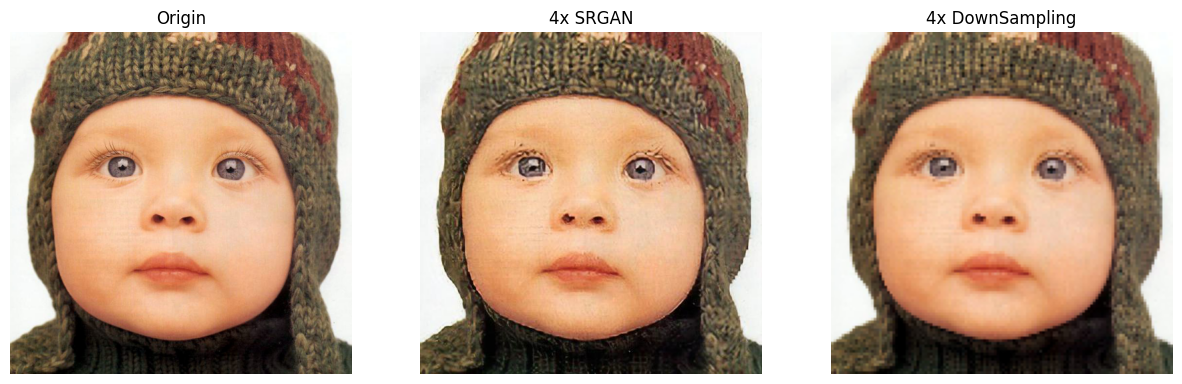


Image 2:
PSNR: 23.91
SSIM: 0.7166


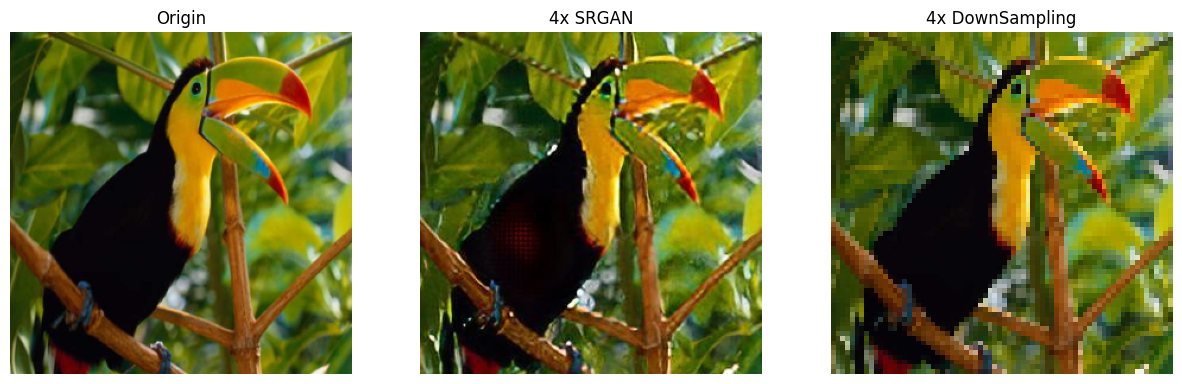


Image 3:
PSNR: 17.03
SSIM: 0.6148


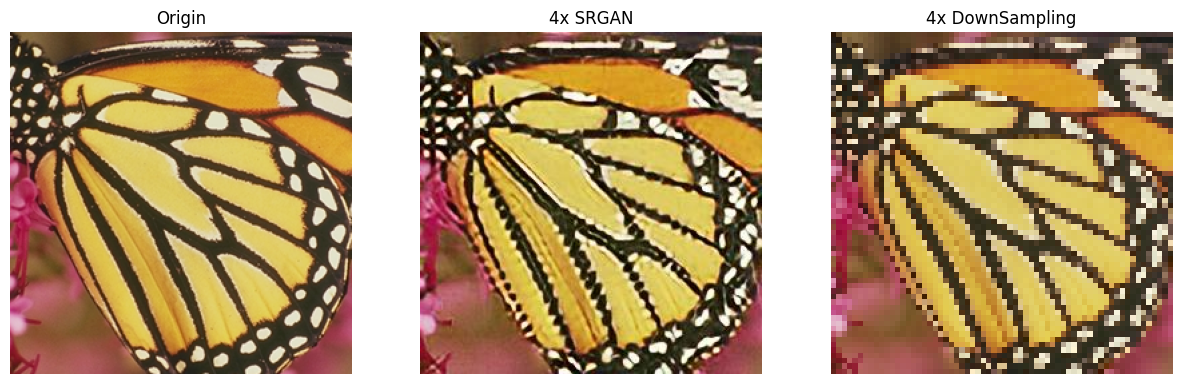


Image 4:
PSNR: 25.14
SSIM: 0.5573


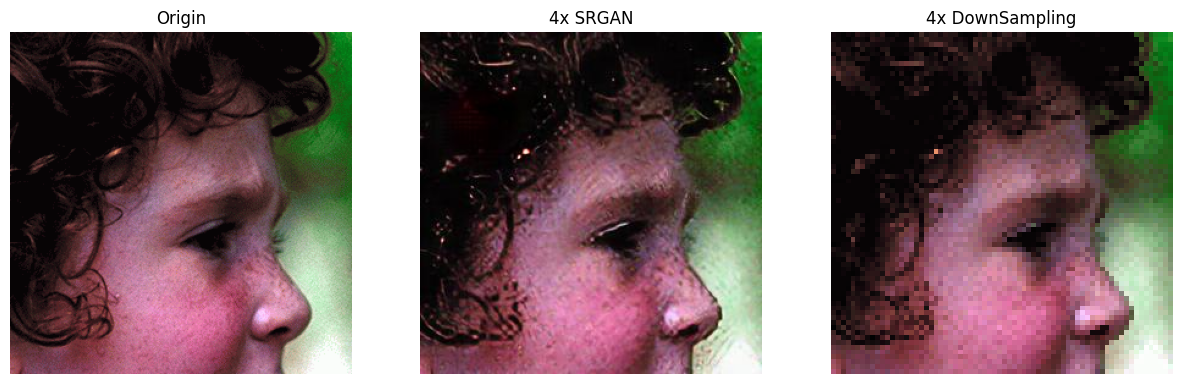


Image 5:
PSNR: 20.89
SSIM: 0.7418


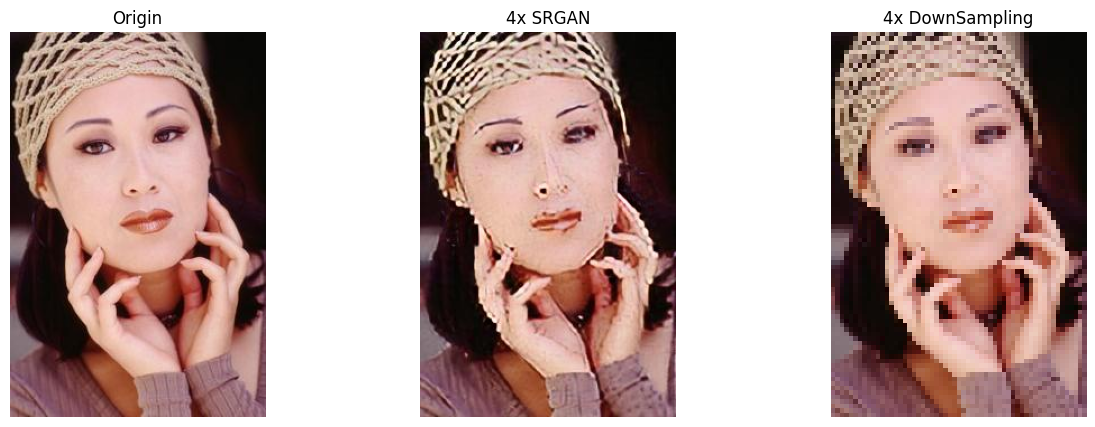

In [13]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

def compare_images(folder_a, folder_b, folder_c):
    images_a = []
    images_b = []
    # 下采样图片
    images_c = []

    # 读取文件夹A中的图像
    for filename in sorted(os.listdir(folder_a)):
        image_a = cv2.imread(os.path.join(folder_a, filename))
        images_a.append(image_a)

    # 读取文件夹B中的图像
    for filename in sorted(os.listdir(folder_b)):
        image_b = cv2.imread(os.path.join(folder_b, filename))
        images_b.append(image_b)

    for filename in sorted(os.listdir(folder_c)):
        image_c = cv2.imread(os.path.join(folder_c, filename))
        images_c.append(image_c)

    # 计算并打印每对图像的PSNR和SSIM
    for i, (image_a, image_b, image_c) in enumerate(zip(images_a, images_b, images_c)):
        psnr_value = psnr(image_a, image_b)
        ssim_value = ssim(image_a, image_b, multichannel=True, channel_axis=2)

        print(f"Image {i+1}:")
        print(f"PSNR: {psnr_value:.2f}")
        print(f"SSIM: {ssim_value:.4f}")
        # print()

        # 使用plt进行对比展示
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(cv2.cvtColor(image_a, cv2.COLOR_BGR2RGB))
        axs[0].set_title('Origin')
        axs[0].axis('off')
        axs[1].imshow(cv2.cvtColor(image_b, cv2.COLOR_BGR2RGB))
        axs[1].set_title('4x SRGAN')
        axs[1].axis('off')
        axs[2].imshow(cv2.cvtColor(image_c, cv2.COLOR_BGR2RGB))
        axs[2].set_title('4x DownSampling')
        axs[2].axis('off')
        plt.show()
        print()


# 设置文件夹A的路径
folder_a = './srgan/src/dataset/Set5/HR'

# 设置文件夹B的路径
folder_b = './srgan/src/output/4x'

folder_c = './srgan/src/dataset/Set5/LR/4x'

# 调用函数进行对比和展示
compare_images(folder_a, folder_b, folder_c)